# TODO LIST
1. One genre per song
2. split train and test
3. 

# Import packages and config

In [ ]:
#!pip install pandas-profiling==2.7.1

In [ ]:
## General packages
import pandas as pd
import numpy as np
import os
import math
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Neural networks packages
from keras import layers, models
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Validacion
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/Asesoftware/Plan semilla/ML Challenge') 
#os.chdir("/content/drive/MyDrive/ASESOFTWARE/ML Challenge") #Thomas
#os.chdir('/content/drive/MyDrive/ASESOFTWARE/ML Challenge') #Sebastian
os.listdir("./")

In [ ]:
#Juan and Thomas run this
drive.mount('/content/drive', force_remount= True)
#os.chdir('/content/drive/MyDrive/Asesoftware/Plan semilla/ML Challenge') 
os.chdir('/content/drive/MyDrive/ML Challenge') 
os.listdir("./")

In [ ]:
DATA_PATH = './data/'
RESULTS_PATH = './results/'

In [ ]:
os.listdir(DATA_PATH)

## Data preprocessing

In [ ]:
songs_genres = pd.read_csv(DATA_PATH+"songs_genres.csv")
df = pd.read_csv(DATA_PATH+"final_data.csv", index_col = False)

songs_genres.genre_id.unique()
songs_genres.drop_duplicates(inplace=True)

### Shuffle
songs_genres = shuffle(songs_genres)

print(songs_genres.value_counts().sum())
songs_genres.drop_duplicates(subset=['track_id'],keep='first',inplace=True)
## TODO plot the distribution
print(songs_genres.genre_id.value_counts())
print(songs_genres.value_counts().sum())

df = df[['artist', 'artist_id', 'track_id', 'track_name', 'duration_ms', 'key','time_signature','mode_Major','mode_Minor', 'acousticness', 'instrumentalness', 'liveness',
       'loudness', 'tempo', 'speechiness', 'valence', 'modulation','singability', 'chillness', 'danceability', 'energy', 'popularity']]
df = df.merge(songs_genres, on='track_id').drop(['modulation','chillness'],axis=1)

227294
7.0     9676
25.0    9017
3.0     8730
10.0    8726
21.0    8709
6.0     8608
26.0    8448
23.0    8421
14.0    8230
20.0    8228
16.0    8085
4.0     7995
15.0    7635
8.0     7461
24.0    6382
11.0    6357
9.0     5040
18.0    4961
12.0    4795
13.0    4738
22.0    4585
2.0     4370
17.0    4265
19.0    4236
5.0     3549
1.0      119
Name: genre_id, dtype: int64
171366


In [ ]:
feature_correlation = df.corr()
feature_correlation.style.background_gradient(cmap='coolwarm')

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
artist_id,1.000000,-0.008049,0.007832,0.002759,-0.077418,-0.011900,-0.028523,0.064371,0.030681,-0.043545,0.050191,-0.027812,0.027823,0.059230,0.039833,-0.001195
duration_ms,-0.008049,1.000000,-0.007466,-0.002240,0.024407,0.069009,0.016501,-0.048721,-0.027412,-0.013198,-0.129746,0.106397,-0.106401,-0.045724,-0.022998,-0.036229
mode_Major,0.007832,-0.007466,1.000000,-0.424276,0.002169,-0.052173,-0.002130,0.009244,0.012571,-0.022972,-0.002589,0.021019,-0.021025,-0.010488,0.050389,-0.020069
mode_Minor,0.002759,-0.002240,-0.424276,1.000000,-0.055745,0.025352,-0.025762,0.032454,-0.001078,0.010175,0.009101,-0.062918,0.062931,0.036754,0.089900,0.015978
acousticness,-0.077418,0.024407,0.002169,-0.055745,1.000000,0.309651,0.086098,-0.696575,-0.267401,0.176694,-0.370210,0.401265,-0.401266,-0.729403,-0.356298,-0.043826
instrumentalness,-0.011900,0.069009,-0.052173,0.025352,0.309651,1.000000,-0.164502,-0.506710,-0.110900,-0.193683,-0.338012,0.377970,-0.377974,-0.401677,-0.165201,0.044022
liveness,-0.028523,0.016501,-0.002130,-0.025762,0.086098,-0.164502,1.000000,0.055456,-0.061028,0.562108,0.014048,0.018190,-0.018185,0.207966,-0.190780,-0.133551
loudness,0.064371,-0.048721,0.009244,0.032454,-0.696575,-0.506710,0.055456,1.000000,0.250003,0.002809,0.439979,-0.475886,0.475889,0.825249,0.328561,-0.023618
tempo,0.030681,-0.027412,0.012571,-0.001078,-0.267401,-0.110900,-0.061028,0.250003,1.000000,-0.102992,0.156593,-0.047647,0.047657,0.247242,0.096841,-0.006007
speechiness,-0.043545,-0.013198,-0.022972,0.010175,0.176694,-0.193683,0.562108,0.002809,-0.102992,1.000000,0.023131,-0.136282,0.136279,0.167052,-0.177383,-0.186843


In [ ]:
df.head()

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
0,!!!,1.0,2UjEyfnKzaY7qpBEeESJjv,Even When The Water's Cold,227067,D,4/4,0,1,0.10800,0.001280,0.1590,-6.847,104.971,0.0391,0.866,0.291,0.709,0.831,59.2,9.0
1,(Hed) P.E.,9.0,40F6hDk7Z7PJNua8SSErJH,Raise Hell,309667,D,4/4,1,0,0.01220,0.000000,0.2600,-3.733,146.040,0.0930,0.517,0.424,0.576,0.967,47.5,5.0
2,(Hed) P.E.,9.0,5yrGsJoG4FsTg6luHlNGK2,Bartender,240880,F#,4/4,1,0,0.00219,0.000003,0.0799,-6.028,96.047,0.0647,0.454,0.334,0.666,0.793,43.0,2.0
3,(Sandy) Alex G,10.0,2wYM37q07tyVSWMZvlgghS,Hope,156614,F#,4/4,0,0,0.32900,0.469000,0.1180,-5.427,98.950,0.0260,0.414,0.447,0.553,0.596,50.0,2.0
4,(Sandy) Alex G,10.0,3NzLIbvq342cvzDlDH33RV,Sarah (Bonus Track),176147,E,4/4,0,0,0.51400,0.000188,0.1380,-5.198,124.023,0.0314,0.497,0.350,0.650,0.686,47.5,13.0


In [ ]:
df[df['instrumentalness']>1]

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
94763,The Arrogant Sons Of Bitches,12396.0,6luidVWKHWkZDmChOiKCXh,Melon Country,155200,E,4/4,1,0,0.123,5.0,0.346,-1.721,100.215,0.209,0.69,0.547,0.453,0.987,14.0,23.0


In [ ]:
## Normalizar: [0,1] x/max(x), Estandarizar media=0 y varianza=1, formula = (x-mean)/std
## Remove negatives, normalize/estandarizar
## Negatives: loudness, chillness, popularity
##MAX(normalize) : duration_ms, artist_id, instrumentalness, loudness, tempo, popularity
df=df[df['instrumentalness']<1]

In [ ]:
c = pd.get_dummies(df.drop(['artist', 'artist_id', 'track_id', 'track_name'],axis=1)).columns

In [ ]:
df_2 = StandardScaler().fit_transform(pd.get_dummies(df.drop(['artist', 'artist_id', 'track_id', 'track_name'],axis=1)))
df_2 = pd.DataFrame(df_2,columns=c)
df_2.to_csv(DATA_PATH+'data_standardScaler.csv',index=False)

In [ ]:
# SCALE THE DATA
df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']] = MinMaxScaler().fit_transform(df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']])
df.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,14.163540
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,7.381211
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,1.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,7.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,14.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,21.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,26.000000


In [ ]:
df.head()

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
0,!!!,1.0,2UjEyfnKzaY7qpBEeESJjv,Even When The Water's Cold,0.038205,D,4/4,0,1,0.10800,0.001281,0.1590,0.286033,0.090019,0.0391,0.866,0.291,0.709,0.831,0.736774,9.0
1,(Hed) P.E.,9.0,40F6hDk7Z7PJNua8SSErJH,Raise Hell,0.053122,D,4/4,1,0,0.01220,0.000000,0.2600,0.305562,0.139583,0.0930,0.517,0.424,0.576,0.967,0.661290,5.0
2,(Hed) P.E.,9.0,5yrGsJoG4FsTg6luHlNGK2,Bartender,0.040700,F#,4/4,1,0,0.00219,0.000003,0.0799,0.291169,0.079250,0.0647,0.454,0.334,0.666,0.793,0.632258,2.0
3,(Sandy) Alex G,10.0,2wYM37q07tyVSWMZvlgghS,Hope,0.025482,F#,4/4,0,0,0.32900,0.469469,0.1180,0.294938,0.082753,0.0260,0.414,0.447,0.553,0.596,0.677419,2.0
4,(Sandy) Alex G,10.0,3NzLIbvq342cvzDlDH33RV,Sarah (Bonus Track),0.029010,E,4/4,0,0,0.51400,0.000188,0.1380,0.296375,0.113012,0.0314,0.497,0.350,0.650,0.686,0.661290,13.0


In [ ]:
df2 = pd.get_dummies(df.drop(['genre_id','artist','track_id','track_name'],axis=1))
df2.head(3)

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,1.0,0.038205,0,1,0.10800,0.001281,0.1590,0.286033,0.090019,0.0391,0.866,0.291,0.709,0.831,0.736774,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,9.0,0.053122,1,0,0.01220,0.000000,0.2600,0.305562,0.139583,0.0930,0.517,0.424,0.576,0.967,0.661290,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,9.0,0.040700,1,0,0.00219,0.000003,0.0799,0.291169,0.079250,0.0647,0.454,0.334,0.666,0.793,0.632258,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df2.to_csv(DATA_PATH+"standirezed_data.csv",index=False)

In [ ]:
df2.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,0.099227,0.067598,0.074052,0.116657,0.097027,0.104531,0.033542,0.075873,0.087480,0.065527,0.114615,0.063870,0.000035,0.013299,0.116803,0.844507,0.025355
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,0.298967,0.251056,0.261857,0.321013,0.295995,0.305949,0.180049,0.264796,0.282538,0.247454,0.318558,0.244521,0.005917,0.114553,0.321187,0.362375,0.157202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df2.drop('artist_id',axis=1)
y = df['genre_id']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

In [ ]:
y_train.value_counts()

7.0     6193
25.0    5771
3.0     5587
10.0    5585
21.0    5573
6.0     5509
26.0    5406
23.0    5389
14.0    5267
20.0    5266
16.0    5174
4.0     5117
15.0    4886
8.0     4775
24.0    4085
11.0    4069
9.0     3226
18.0    3175
12.0    3069
13.0    3032
22.0    2934
2.0     2797
17.0    2730
19.0    2711
5.0     2271
1.0       76
Name: genre_id, dtype: int64

In [ ]:
### Train test split FOR CATEGORICAL ALGORITHMS: 20% test
X = df.drop('genre_id')
y = df['genre_id']

XC_train, XC_test, yc_train, yc_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-b95b439f670d>", line 2, in <module>
    X = df.drop('genre_id')
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4174, in drop
    errors=errors,
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py", line 3889, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py", line 3923, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 5287, in drop
    raise KeyError(f"{labels[mask]} not found in axis")
KeyError: "['genre_id'] not found in axis"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  Fil

KeyError: ignored

# Logisitc regression

In [ ]:
 import time
 #Load in data from our standardised dataset
 
 df_standard =  pd.read_csv(DATA_PATH+"data_standarScaler.csv", index_col = False)

df_standard.drop(columns='singability', inplace=True)
df_standard.head()

#load in original dataset

### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df_standard
y = df['genre_id']
X_train, X_test, y_train, y_test = train_test_split( X, y,\
                          test_size=0.2,random_state=1234, stratify = y)

In [ ]:
#Thomas: Remove time_signature features
X_train.columns

X_train.drop(columns = ['time_signature_0/4',  'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',  'time_signature_5/4'], inplace = True)

X_train.columns

X_test.drop(columns = ['time_signature_0/4',  'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',  'time_signature_5/4'], inplace = True)

X_test.columns

print('X_train shape= ', X_train.shape)
print('X_test shape= ', X_test.shape)
print('y_train shape= ', y_train.shape)
print('y_test shape= ', y_test.shape)

In [ ]:
#Thomas: Remove time_signature features
X_train.columns

X_train.drop(columns = ['time_signature_0/4',  'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',  'time_signature_5/4'], inplace = True)

X_train.columns

X_test.drop(columns = ['time_signature_0/4',  'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',  'time_signature_5/4'], inplace = True)

X_test.columns

print('X_train shape= ', X_train.shape)
print('X_test shape= ', X_test.shape)
print('y_train shape= ', y_train.shape)
print('y_test shape= ', y_test.shape)

## Building our model

In [ ]:
#Train our model using the standardised dataset having dropped singability 

#Define our model

#I would like to build a linear logistic regression model for many classes
# multi_class = 'ovo' or multinomial suggest = One class (7000) Vs Other class (95), ovr = One class vs Rest. genre = 7: 7700 observations vs 130.000 obervations
# class_weight = 'balanced'
# random_state = number 

start_time = time.time() #time how long training takes

#Let's start with a set of hyperparameters
model = LogisticRegression(penalty='l1',multi_class='multinomial', solver='saga', max_iter= 1000,class_weight = 'balanced',random_state =1234)
model.fit(X_train, y_train) #train the model

end_time = time.time()
timeALL = round(end_time - start_time,3)
print("--- Code took {}s seconds ---".format(time))

In [ ]:
# Test our data

#score = round(model.score(X_test, y_test)*100,2)

#print(score)


pred = model.predict(X_test)
print('----------Model report on all classes ----------')
print(classification_report(y_test,pred))

----------Model report on all classes ----------
              precision    recall  f1-score   support

         1.0       0.63      1.00      0.77        24
         2.0       0.39      0.51      0.44       868
         3.0       0.78      0.80      0.79      1743
         4.0       0.69      0.67      0.68      1594
         5.0       0.15      0.15      0.15       711
         6.0       0.87      0.82      0.85      1731
         7.0       0.98      0.95      0.97      1935
         8.0       0.54      0.63      0.58      1475
         9.0       0.36      0.35      0.35      1004
        10.0       0.71      0.68      0.70      1751
        11.0       0.41      0.43      0.42      1259
        12.0       0.47      0.44      0.45       973
        13.0       0.34      0.19      0.25       975
        14.0       0.63      0.51      0.56      1643
        15.0       0.74      0.68      0.71      1528
        16.0       0.81      0.87      0.84      1613
        17.0       0.37      0.4

In [ ]:
#Analysis of this result

In [ ]:
# For more advanced model, we can build a polynomial model 
#see: https://stackoverflow.com/questions/55937244/how-to-implement-polynomial-logistic-regression-in-scikit-learn

#We will have xi, xi^2, xixj features

In [ ]:
#Let's have a more detailed look at how the probabilities are predicted 

yhat_prob = model.predict_proba(X_test)

For the first example, the correct genre is 25.0


Text(0, 0.5, 'Classification probability')

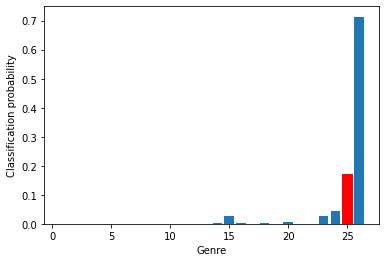

In [ ]:
#Let's take a look at how our model classifies the first test example
example = 1
x = np.linspace(1,26,26)
print('For the first example, the correct genre is {}'.format(y_test.iloc[example]))

barlist = plt.bar(x,yhat_prob[example])
barlist[int(y_test.iloc[example] -1 )].set_color('r')

plt.xlabel('Genre')
plt.ylabel('Classification probability')

For example 0, the correct genre is 13.0


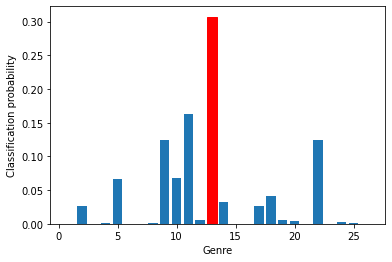


For example 1, the correct genre is 25.0


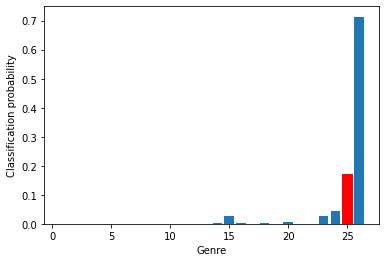


For example 2, the correct genre is 25.0


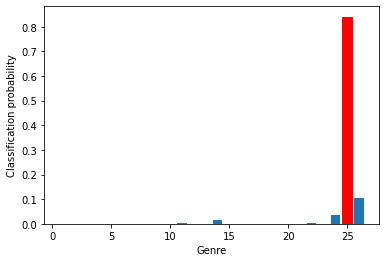


For example 3, the correct genre is 11.0


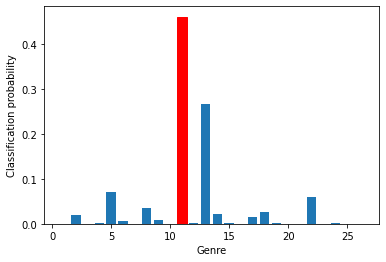


For example 4, the correct genre is 6.0


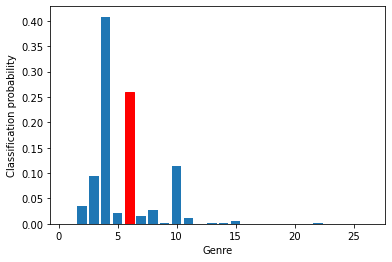


For example 5, the correct genre is 6.0


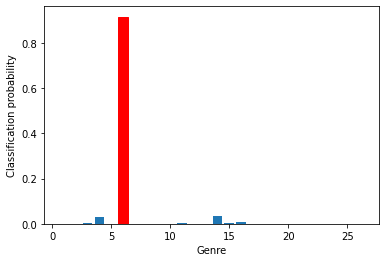


For example 6, the correct genre is 4.0


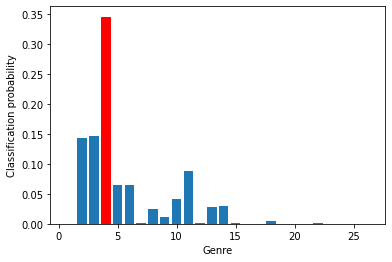


For example 7, the correct genre is 3.0


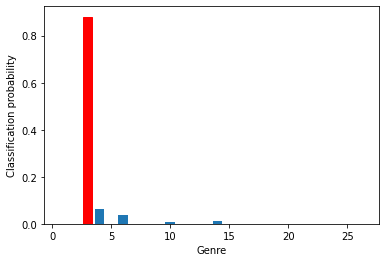


For example 8, the correct genre is 11.0


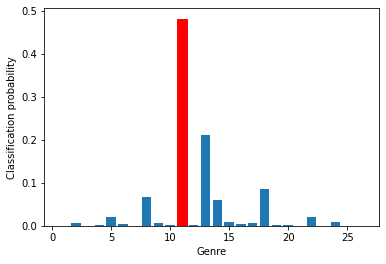


For example 9, the correct genre is 21.0


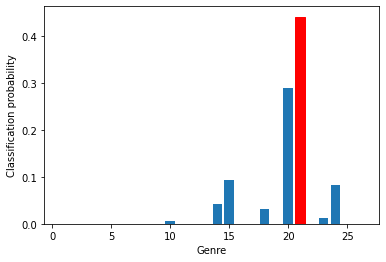

In [ ]:
# Let's see how it classifies the first 10 examlpes
x = np.linspace(1,26,26)

for i in range(10):
  example = int(i) 

  print('For example {}, the correct genre is {}'.format(i,y_test.iloc[example]))
  barlist = plt.bar(x,yhat_prob[example])
  barlist[int(y_test.iloc[example] -1 )].set_color('r')
  plt.xlabel('Genre')
  plt.ylabel('Classification probability')
  plt.show()
  print()

In [ ]:
#Grid search to optimise hyperparameters 

#pipe = Pipeline([('clf')])
param_grid = [ #A dictionary containing all the HP options
  {'penalty': ['l1','l2'], #type of regularization, l1 is lasso, l2 is ridge, elasticnet is both
    'C': np.logspace(-2,2,4),  #inverse of regularization strength (i.e. 1 /lambda)
    'solver' : ['lbfgs','newton-cg','sag','saga'] # differnt solvers
  }

]

clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose = True, n_jobs=1)

#model is our logreg model
#paramter grid as defined above
#cv = 3 means 3 Cv folds
# verbose gives us updates as the gridsearch is working
#njobs = -1??

In [ ]:
time1 = time.time()

best_clf = clf.fit(X_train,y_train)

time2 = time.time()

print(time2-time1)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 pe

17678.366580486298


In [ ]:
#Let's see which model had the best results
best_model  = best_clf.best_estimator_
best_model

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=1234, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Check accuracy (on the training set)

print(f'Accuracy-: {best_clf.score(X_train,y_train):.3f}')

Accuracy-: 0.640


In [ ]:
pred = best_model.predict(X_test)
print('----------Model report on all classes ----------')
print(classification_report(y_test,pred))

----------Model report on all classes ----------
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        24
         2.0       0.39      0.51      0.44       868
         3.0       0.78      0.81      0.80      1743
         4.0       0.70      0.69      0.69      1594
         5.0       0.15      0.15      0.15       711
         6.0       0.88      0.82      0.85      1731
         7.0       0.98      0.95      0.97      1935
         8.0       0.54      0.63      0.58      1475
         9.0       0.36      0.35      0.35      1004
        10.0       0.71      0.68      0.70      1751
        11.0       0.41      0.43      0.42      1259
        12.0       0.47      0.44      0.46       973
        13.0       0.34      0.19      0.25       975
        14.0       0.63      0.51      0.56      1643
        15.0       0.74      0.68      0.71      1528
        16.0       0.81      0.87      0.84      1613
        17.0       0.37      0.4

In [ ]:
#Train using elasticnet penalty on saga 

model = LogisticRegression( max_iter= 1000,random_state =1234)

param_grid_elasticnet = [ #A dictionary containing all the HP options
  {'penalty': ['elasticnet'], #type of regularization, l1 is lasso, l2 is ridge, elasticnet is both
    'C': np.logspace(-2,2,4),  #inverse of regularization strength (i.e. 1 /lambda)
    'solver' : ['saga'], # differnt solvers
    'l1_ratio': [0.25,0.5,0.75]
#'max_iter' : [100,1000,2500,5000] #if more iterations are needed
  }
]

clf_elasticnet = GridSearchCV(model, param_grid = param_grid_elasticnet, cv = 3, verbose = True, n_jobs=-1)

best_clf_elasticnet = clf_elasticnet.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: Convergenc

In [ ]:
#Let's see which model had the best results
best_model_elasticnet  = best_clf_elasticnet.best_estimator_
best_model_elasticnet

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.75, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=1234, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = best_model_elasticnet.predict(X_test)
print('----------Model report on all classes ----------')
print(classification_report(y_test,pred))

----------Model report on all classes ----------
              precision    recall  f1-score   support

         1.0       0.91      0.42      0.57        24
         2.0       0.40      0.50      0.44       878
         3.0       0.77      0.84      0.80      1744
         4.0       0.68      0.70      0.69      1597
         5.0       0.15      0.06      0.08       711
         6.0       0.87      0.85      0.86      1722
         7.0       0.98      0.95      0.97      1935
         8.0       0.49      0.68      0.57      1484
         9.0       0.34      0.35      0.34      1015
        10.0       0.68      0.73      0.70      1747
        11.0       0.42      0.43      0.42      1276
        12.0       0.45      0.44      0.44       962
        13.0       0.31      0.14      0.19       955
        14.0       0.62      0.57      0.59      1647
        15.0       0.78      0.71      0.74      1531
        16.0       0.82      0.88      0.85      1619
        17.0       0.38      0.4

In [ ]:
best_weights = best_model_elasticnet.coef_
print (best_weights)

[[ 2.01254925e-02 -1.12156758e-01 -1.32898652e-01  1.20881625e+00
  -1.13851262e+00 -6.68068025e-01  3.00034954e-01 -1.51448811e-01
   5.26127907e-01  4.63075993e-01 -8.93249932e-01 -6.79410782e-01
  -5.15422945e+00 -1.48092242e+01 -6.76139937e-02  1.41579441e-01
   8.63709855e-02 -5.30199791e-02 -1.35321707e-02 -2.76773466e-02
  -7.46090910e-02 -7.07098720e-02  5.77039723e-02 -7.22171209e-02
   9.90926158e-03  9.87501813e-02]
 [-2.32477555e-01  1.59002578e-01  1.36419152e-01 -6.12126133e-01
   3.97871406e-01 -4.80795406e-03  7.62377619e-02 -2.70886790e-03
   5.11464941e-01 -3.47036982e-01  2.12511793e-03  1.73639399e-01
   1.91384491e+00 -3.56375864e+00 -1.89172452e-02 -3.49773586e-02
   4.53481022e-02 -6.66163651e-03  4.26955695e-03  9.40795814e-03
   2.21567864e-02  7.82746613e-05 -4.11784029e-05  1.21728162e-02
  -6.33176316e-03 -2.72394092e-03]
 [ 4.56167116e-02 -8.51435844e-02 -3.10631299e-03  3.08935406e-01
   1.03703574e+00 -2.31638994e-01 -2.49809484e-02  5.10867192e-02
  -4.2

In [ ]:
np.savetxt("Logistic_Regression.csv", best_weights,delimiter=",")

## Load best model from Pickle file 

In [ ]:
import pickle

In [ ]:
# Save the model as a file in the current working directory
pkl_filename = "logistic_regression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model_elasticnet, file)


In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)


pred = pickle_model.predict(X_test)
print('----------Model report on all classes ----------')
print(classification_report(y_test,pred))

Test score: 63.89 %
----------Model report on all classes ----------
              precision    recall  f1-score   support

         1.0       0.91      0.42      0.57        24
         2.0       0.40      0.50      0.44       878
         3.0       0.77      0.84      0.80      1744
         4.0       0.68      0.70      0.69      1597
         5.0       0.15      0.06      0.08       711
         6.0       0.87      0.85      0.86      1722
         7.0       0.98      0.95      0.97      1935
         8.0       0.49      0.68      0.57      1484
         9.0       0.34      0.35      0.34      1015
        10.0       0.68      0.73      0.70      1747
        11.0       0.42      0.43      0.42      1276
        12.0       0.45      0.44      0.44       962
        13.0       0.31      0.14      0.19       955
        14.0       0.62      0.57      0.59      1647
        15.0       0.78      0.71      0.74      1531
        16.0       0.82      0.88      0.85      1619
        17.0

For example 1, the correct genre is 14.0


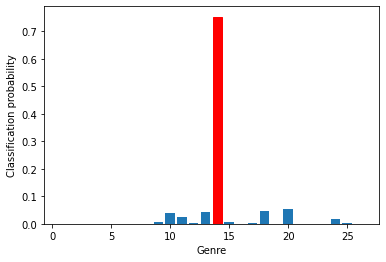


For example 2, the correct genre is 26.0


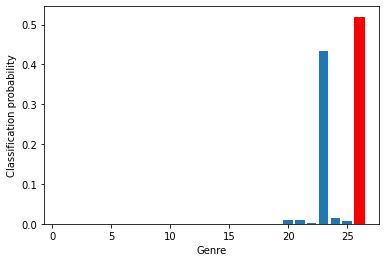


For example 3, the correct genre is 18.0


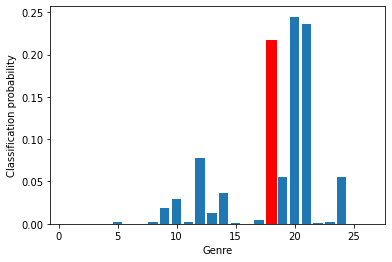


For example 4, the correct genre is 26.0


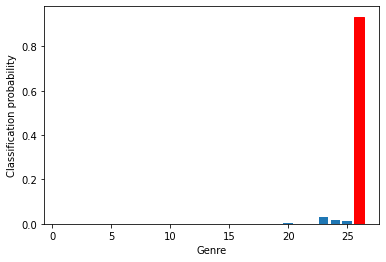


For example 5, the correct genre is 20.0


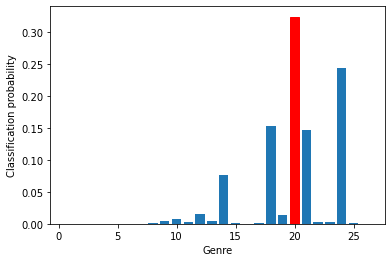


For example 6, the correct genre is 14.0


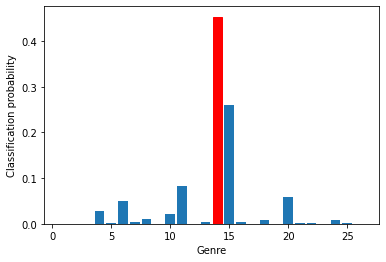


For example 7, the correct genre is 23.0


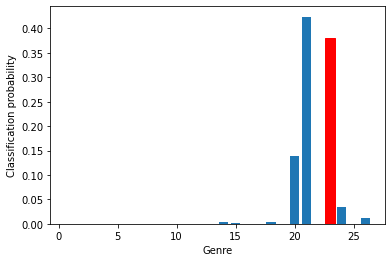


For example 8, the correct genre is 15.0


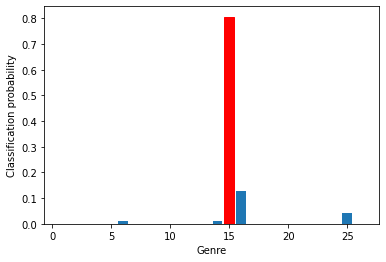


For example 9, the correct genre is 16.0


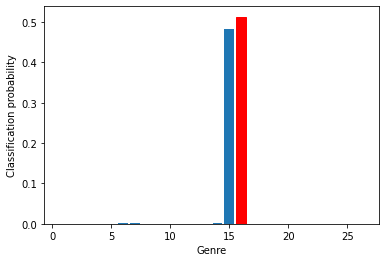


For example 10, the correct genre is 16.0


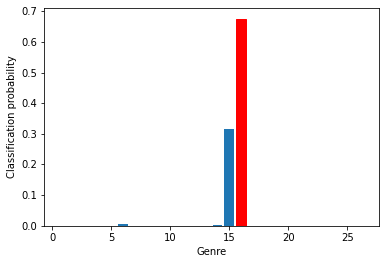


For example 11, the correct genre is 12.0


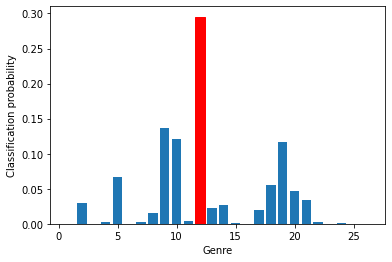


For example 12, the correct genre is 5.0


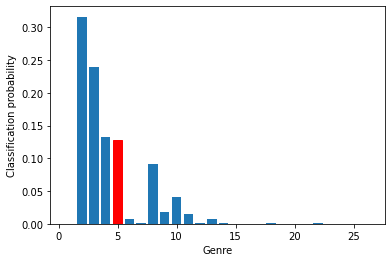


For example 13, the correct genre is 22.0


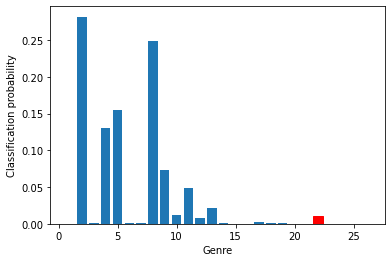


For example 14, the correct genre is 17.0


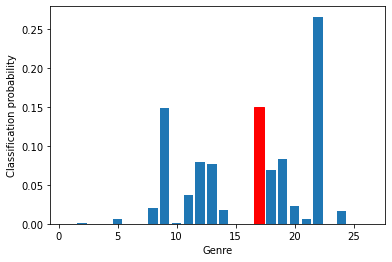


For example 15, the correct genre is 20.0


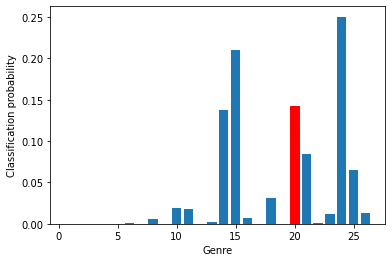


For example 16, the correct genre is 18.0


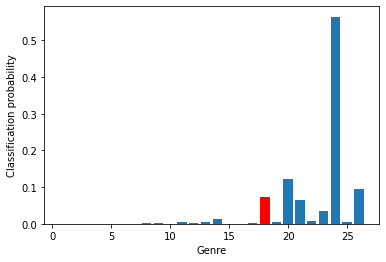


For example 17, the correct genre is 8.0


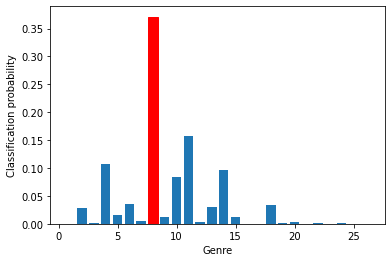


For example 18, the correct genre is 24.0


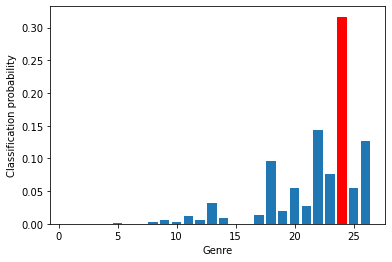


For example 19, the correct genre is 7.0


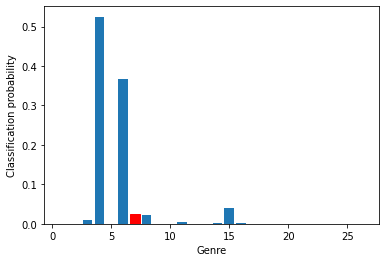


For example 20, the correct genre is 16.0


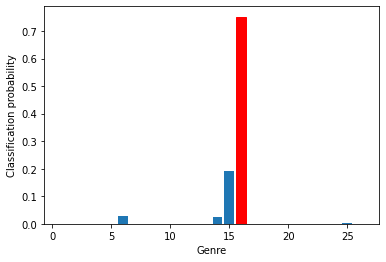


For example 21, the correct genre is 21.0


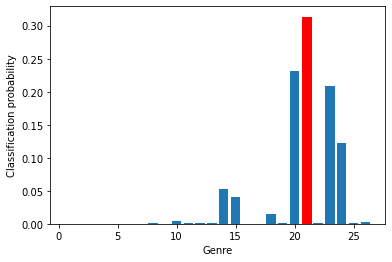


For example 22, the correct genre is 20.0


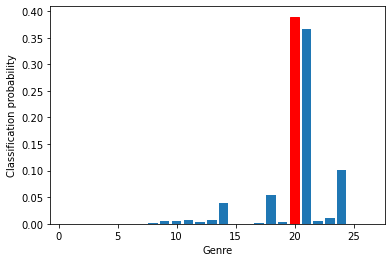


For example 23, the correct genre is 24.0


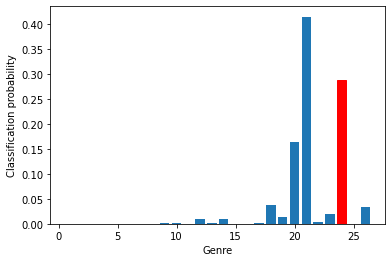


For example 24, the correct genre is 7.0


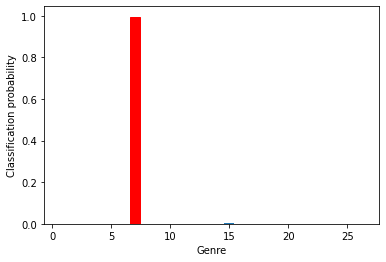


For example 25, the correct genre is 18.0


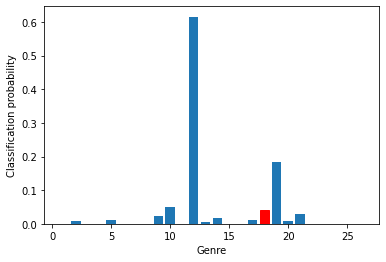

In [ ]:
#Let's have a more detailed look at how the probabilities are predicted 


# Let's see how it classifies the first 10 examlpes

yhat_prob = pickle_model.predict_proba(X_test)
x = np.linspace(1,26,26)

for i in range(25):
  example = int(i) 

  print('For example {}, the correct genre is {}'.format(i+1,y_test.iloc[example]))
  barlist = plt.bar(x,yhat_prob[example])
  barlist[int(y_test.iloc[example] -1 )].set_color('r')
  plt.xlabel('Genre')
  plt.ylabel('Classification probability')
  plt.savefig(fname = DATA_PATH+"example {}".format(i), dpi = 300)
  plt.show()

  print()

#### Results (performance)

# SVM

In [ ]:
#apply PCA to reduce the number of features
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(X)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(principalComponents, y, test_size=0.8, random_state=1234, stratify = y)

In [ ]:
pipe = Pipeline([('clf', SVC(random_state=1234)),])
# tuneo 
#C, kernel y decision function shape
param_grid = dict(clf__C=[ 0.01,0.1,1],
                  clf__gamma = ['scale', 'auto'],
                  clf__class_weight=['balanced', None],
                  clf__decision_function_shape=['ovo', 'ovr'])

In [ ]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

# Se ajusta el modelo con las diferentes configuraciones
grid_search.fit(X_train1,y_train1)

print(grid_search.best_params_)
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.208, total= 2.7min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.218, total= 2.6min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.3min remaining:    0.0s


[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.209, total= 2.6min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.181, total= 2.6min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.216, total= 2.6min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto, score=0.116, total= 2.7min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto, score=0.1

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 197.3min finished


{'clf__C': 1, 'clf__class_weight': None, 'clf__decision_function_shape': 'ovo', 'clf__gamma': 'scale'}


NameError: ignored

In [ ]:
# Create a model with the optimal hyperparameters
# that we obtained from the gridsearch

rbf = svm.SVC(kernel = 'rbf',C= 0.1, decision_function_shape ='ovr', random_state=1234)
rbf.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

#### Results (performance)

In [ ]:
# retrieve the accuracy
accuracy_rbf = rbf.score(X_test, y_test)
print(accuracy_rbf)

0.37889884165377996


In [ ]:
y_pred = rbf.predict(X_test)

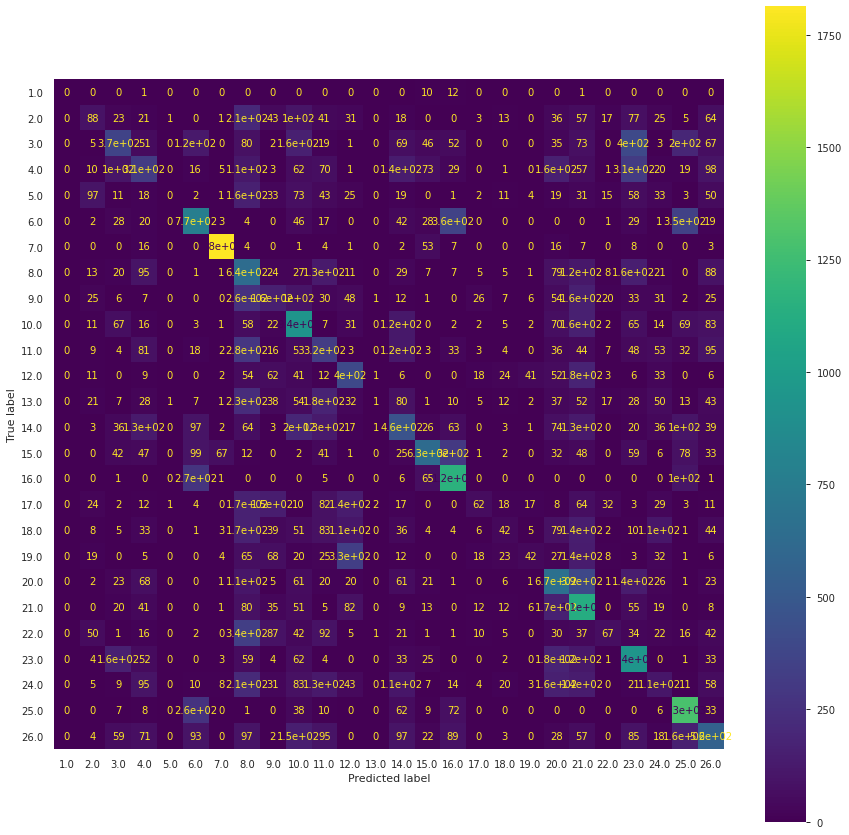

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rbf.classes_)
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(rbf, X_test, y_test, ax=ax)

plt.show()

In [ ]:
print("DecisionTrees's F1_Score: ", metrics.f1_score(y_test, y_pred))

ValueError: ignored

# Decision Tree



In [ ]:
dot_data = tree.export_graphviz(alg1, out_file=None, 
                      feature_names=list(X_train1.columns),  
                      class_names=['0','1','2'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Results performance

# Neuronal network

In [ ]:
X = df.drop('artist_id',axis=1)
y = df['genre_id']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

In [ ]:
# Tuneo
# Optimizer, loss, layers number, neurons per each layer, batch size, epochs, 
!nvidia-smi

Tue Oct  5 21:34:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def build_model(
    activation: str = "relu", units: int = 32, 
    optimizer: str = "adam", hiden_layers: int = 2
) -> tf.keras.Sequential:
    """
    Function to create a model by params
    :param activation: the activation function
    :type activation: str
    :param units: The number of neurons per layer
    :type units: int
    :param optimizer: The optimizer function
    :type optimizer: str
    :return: The model created with the defined params
    :rtype: tf.keras.Sequential
    """
    layers = []
    layers.append(tf.keras.layers.Dense(31, activation=activation))
    for i in range(0,hiden_layers):
      layers.append(tf.keras.layers.Dense(units, activation=activation))
    layers.append(tf.keras.layers.Dense(26,activation='softmax'))

    print(activation,units,optimizer,hiden_layers)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model = tf.keras.Sequential(layers)
    ##loss = 'mse'
    model.compile(optimizer=optimizer, loss="categorical_crossentropy")
    return model

In [ ]:
model = KerasClassifier(build_fn=build_model, batch_size=256)

In [ ]:
param_grid = {
    "epochs": [10,15],
    "activation": ["relu", "selu"],
    "units": [ 16, 32],
    "optimizer": ["adam", "rmsprop"],
    "hiden_layers":[5,10]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", n_jobs=-1)

In [ ]:
grid_search.fit(X_train.values, y_train.values)

relu 16 adam 5


ValueError: ignored

In [ ]:
grid_search.best_params_

NameError: ignored

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

{'activation': 'selu',
 'epochs': 10,
 'hiden_layers': 5,
 'optimizer': 'adam',
 'units': 32}

In [ ]:
grid_search.best_score_

0.43540346176852457

In [ ]:
y_pred = model.predict(X_val.values)

In [ ]:
#x_train, y_train, batch_size=128, epochs=50, verbose=0, validation_split=.1

#### Results performance


In [ ]:
model = build_model(activation="selu")
history = model.fit(
    X_train.values, y_train.values,
    epochs=50,
    validation_data=(X_val.values, y_val.values)
)

# K-means 
Agrupar canciones solo por sus caracteristicas

In [ ]:
df_kmeans = pd.read_csv(DATA_PATH+"standirezed_data.csv").drop('artist_id',axis=1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


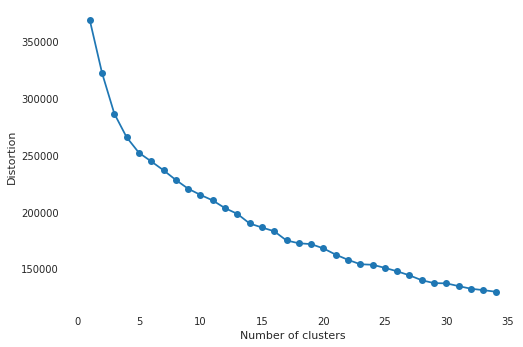

In [ ]:
#Elbow method
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 35):
    print(i)
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1234
    )
    km.fit(df_kmeans)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
silhouette = [0]
for n in range(2 , 25):
    print(n)
    algorithm = (KMeans(n_clusters = n ,init='random', n_init = 10 , max_iter=300, tol=1e-04,  random_state= 1234) )
    algorithm.fit(df_kmeans)
    labels = algorithm.labels_
    centers = algorithm.cluster_centers_
    silhouette.append(silhouette_score(df_kmeans, labels, metric = 'euclidean'))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [ ]:
plt.figure(1 , figsize = (25 ,6))
plt.plot(np.arange(1 , 25) , silhouette , 'o')
plt.plot(np.arange(1 , 25) , silhouette , '-' , alpha = 0.5)
plt.xlabel('K - Cantidad de grupos') , plt.ylabel('Siloueta')
plt.show()

estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ]
pipe = Pipeline(estimators)
X_mod = pipe.fit_transform(X)
data_mod = pd.DataFrame(X_mod,columns=X.columns)
data_mod.head()
model.fit(X,Y)
pred1 = model.predict(X)
display(pred1)
plot_confusion_matrix(model,X,Y,display_labels=le.classes_,values_format='d')
print('----------Reporte para el Modelo 1----------')
print(classification_report(Y,pred1,target_names=le.classes_))
print('----------Reporte para el Modelo 2----------')
print(classification_report(Y,pred2,target_names=le.classes_))
param_grid = dict(imputer__num__strategy=['mean', 'median'],
                  imputer__cat__strategy=['most_frequent', 'constant'],
                  encoder=[OrdinalEncoder(), OneHotEncoder()],
                  normalize=['passthrough', MaxAbsScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

grid_search.fit(X,Y.ravel())
print(grid_search.best_params_)

dump(grid_search.best_estimator_, 'my_model.joblib') 

model = load('my_model.joblib') 

pred1 = model.predict(X)
print('----------Reporte para el Mejor Modelo----------')
print(classification_report(Y,pred1,target_names=le.classes_))

In [ ]:
#Hyperarameter tunning: algoritmo, K, init, max_iter

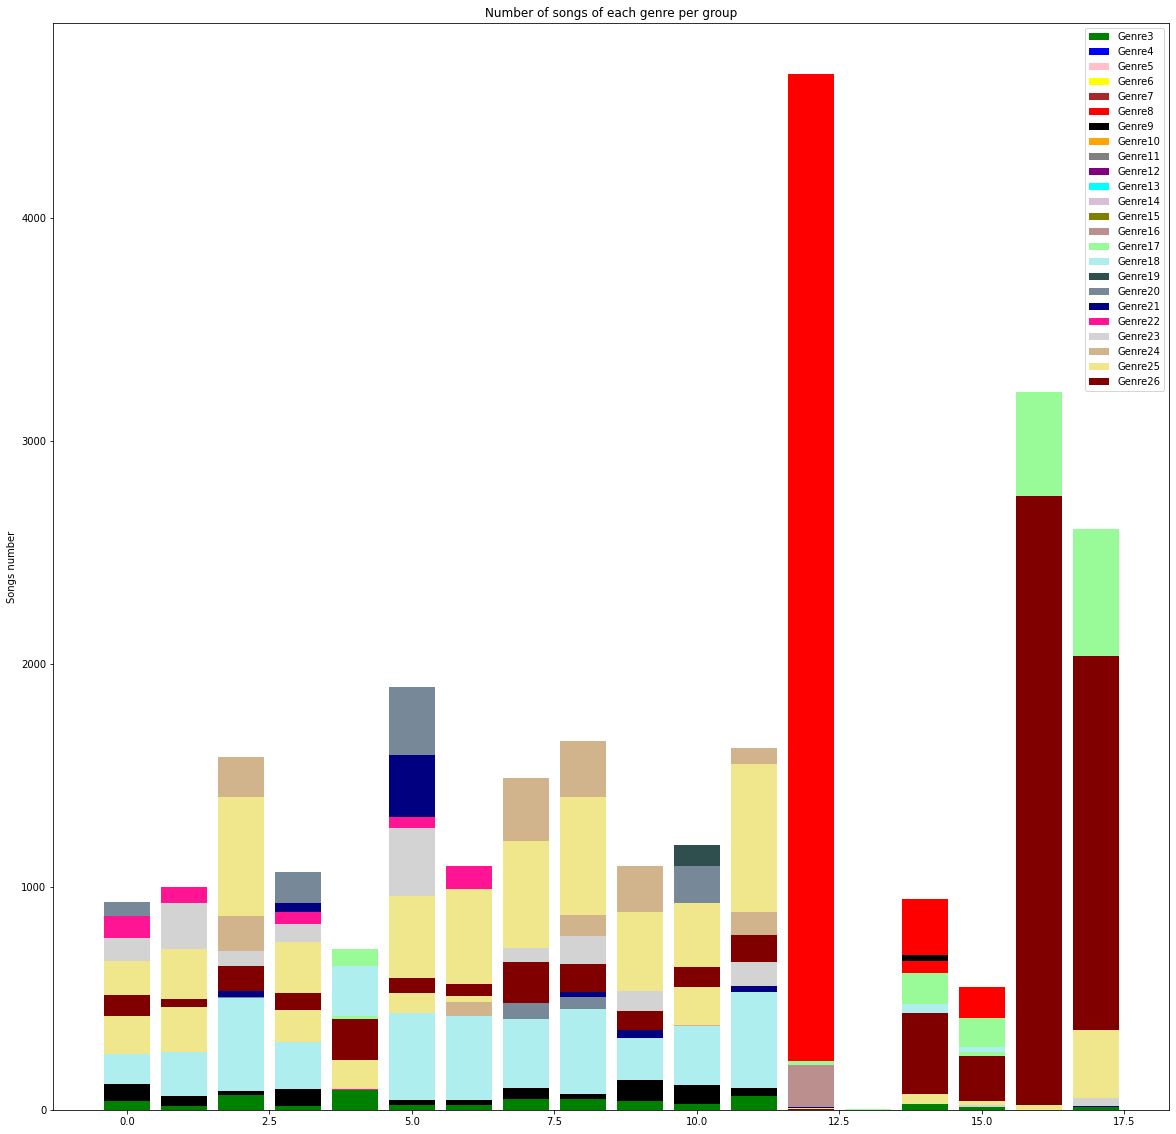

In [ ]:
import matplotlib.pyplot as plt
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#genre1=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#genre2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
genre3=[347, 472, 608, 397, 202, 597, 538, 671, 511, 508, 428, 661, 0, 0, 70, 22, 3, 158]
genre4=[298, 376, 512, 381, 207, 466, 389, 483, 493, 386, 473, 521, 0, 0, 89, 57, 614, 448]
genre5=[272, 256, 802, 274, 129, 318, 388, 729, 764, 478, 490, 694, 9, 0, 31, 45, 22, 492]
genre6=[384, 489, 636, 460, 162, 606, 567, 642, 550, 410, 454, 619, 0, 0, 47, 24, 3, 141]
genre7=[71, 56, 102, 63, 345, 79, 61, 112, 91, 133, 73, 91, 11, 0, 278, 205, 2949, 1473]
genre8=[39, 15, 66, 17, 97, 23, 21, 50, 47, 40, 24, 63, 4632, 1, 669, 344, 1, 44]
genre9=[300, 382, 835, 344, 215, 423, 403, 741, 602, 606, 412, 643, 0, 0, 26, 20, 1, 241]
genre10=[353, 516, 678, 478, 141, 645, 524, 523, 501, 428, 507, 797, 0, 0, 44, 13, 0, 45]
genre11=[463, 470, 645, 388, 135, 885, 562, 475, 531, 407, 513, 510, 3, 0, 47, 22, 44, 93]
genre12=[274, 279, 658, 256, 211, 332, 407, 628, 598, 568, 399, 746, 0, 0, 88, 73, 103, 574]
genre13=[505, 411, 464, 524, 101, 1202, 525, 470, 428, 337, 457, 598, 5, 0, 112, 25, 0, 30]
genre14=[327, 404, 589, 376, 204, 469, 549, 552, 560, 478, 473, 771, 1, 0, 68, 23, 40, 310]
genre15=[534, 313, 567, 372, 219, 465, 334, 442, 388, 323, 645, 586, 8, 0, 101, 56, 354, 486]
genre16=[348, 171, 479, 276, 300, 210, 217, 403, 317, 242, 417, 568, 200, 0, 214, 152, 786, 894]
genre17=[114, 63, 85, 93, 419, 44, 43, 98, 69, 134, 113, 99, 17, 2, 399, 258, 2432, 1711]
genre18=[426, 444, 570, 451, 225, 742, 475, 533, 452, 445, 568, 640, 0, 2, 77, 25, 10, 108]
genre19=[459, 480, 500, 505, 164, 824, 492, 406, 451, 356, 619, 600, 2, 0, 130, 46, 0, 160]
genre20=[472, 430, 506, 560, 138, 1073, 534, 514, 505, 321, 474, 528, 8, 0, 100, 19, 0, 11]
genre21=[388, 461, 883, 369, 87, 520, 537, 508, 692, 472, 437, 655, 5, 0, 141, 16, 0, 22]
genre22=[480, 536, 641, 520, 107, 794, 555, 480, 600, 380, 463, 556, 1, 0, 51, 12, 0, 17]
genre23=[289, 390, 712, 314, 145, 468, 419, 765, 779, 562, 376, 735, 0, 0, 30, 38, 34, 137]
genre24=[248, 259, 869, 306, 93, 434, 482, 725, 873, 532, 379, 886, 5, 0, 27, 21, 0, 54]
genre25=[421, 461, 533, 448, 225, 525, 509, 481, 529, 357, 550, 664, 1, 0, 72, 38, 22, 357]
genre26=[92, 35, 111, 77, 182, 64, 55, 183, 123, 87, 91, 119, 2, 0, 363, 202, 2729, 1678]
#width = 0.35 
fig, ax = plt.subplots(figsize=(20,20))

#ax.bar(labels, genre1, label='Genre1')
#ax.bar(labels, genre2, label='Genre2',bottom=genre1)
ax.bar(labels, genre3, label='Genre3',color ='green')
ax.bar(labels, genre4, label='Genre4',bottom=genre3,color ='blue')
ax.bar(labels, genre5, label='Genre5',bottom=genre4,color ='pink')
ax.bar(labels, genre6, label='Genre6',bottom=genre5,color ='yellow')
ax.bar(labels, genre7, label='Genre7',bottom=genre6,color ='brown')
ax.bar(labels, genre8, label='Genre8',bottom=genre7,color ='red')
ax.bar(labels, genre9, label='Genre9',bottom=genre8,color ='black')
ax.bar(labels, genre10, label='Genre10',bottom=genre9,color ='orange')
ax.bar(labels, genre11, label='Genre11',bottom=genre10,color ='gray')
ax.bar(labels, genre12, label='Genre12',bottom=genre11,color ='purple')
ax.bar(labels, genre13, label='Genre13',bottom=genre12,color ='cyan')
ax.bar(labels, genre14, label='Genre14',bottom=genre13,color ='thistle')
ax.bar(labels, genre15, label='Genre15',bottom=genre14,color ='olive')
ax.bar(labels, genre16, label='Genre16',bottom=genre15,color ='rosybrown')
ax.bar(labels, genre17, label='Genre17',bottom=genre16,color ='palegreen')
ax.bar(labels, genre18, label='Genre18',bottom=genre17,color ='paleturquoise')
ax.bar(labels, genre19, label='Genre19',bottom=genre18,color ='darkslategray')
ax.bar(labels, genre20, label='Genre20',bottom=genre19,color ='lightslategray')
ax.bar(labels, genre21, label='Genre21',bottom=genre20,color ='navy')
ax.bar(labels, genre22, label='Genre22',bottom=genre21,color ='deeppink')
ax.bar(labels, genre23, label='Genre23',bottom=genre22,color ='lightgrey')
ax.bar(labels, genre24, label='Genre24',bottom=genre23,color ='tan')
ax.bar(labels, genre25, label='Genre25',bottom=genre24,color ='khaki')
ax.bar(labels, genre26, label='Genre26',bottom=genre25,color ='maroon')


ax.set_ylabel('Songs number')
ax.set_title('Number of songs of each genre per group')
ax.legend()

plt.show()

#### Results performance

In [ ]:
X_train_2 = pd.read_csv(DATA_PATH+'data_k_means_graphics.csv')

In [ ]:
a = ['acousticness','liveness', 'singability', 'danceability', 'energy']
b = ['liveness','energy','popularity','speechiness','valence','acousticness','singability','danceability']
c = ['valence','acousticness','liveness','speechiness','singability']
d = ['speechiness','singability','acousticness','liveness', 'valence','energy','danceability','popularity']
e = ['danceability','acousticness','liveness','speechiness','valence','popularity','energy']
f = ['singability','liveness','acousticness','energy','speechiness','popularity']
g = ['popularity','acousticness','speechiness','valence','liveness','danceability','singability']
h = ['energy','speechiness','acousticness','valence','liveness','singability','danceability']

import plotly.express as px
import numpy as np
from itertools import combinations
list_ = list(combinations(b, 3))
print(len(list_))
print(list_)

56
[('liveness', 'energy', 'popularity'), ('liveness', 'energy', 'speechiness'), ('liveness', 'energy', 'valence'), ('liveness', 'energy', 'acousticness'), ('liveness', 'energy', 'singability'), ('liveness', 'energy', 'danceability'), ('liveness', 'popularity', 'speechiness'), ('liveness', 'popularity', 'valence'), ('liveness', 'popularity', 'acousticness'), ('liveness', 'popularity', 'singability'), ('liveness', 'popularity', 'danceability'), ('liveness', 'speechiness', 'valence'), ('liveness', 'speechiness', 'acousticness'), ('liveness', 'speechiness', 'singability'), ('liveness', 'speechiness', 'danceability'), ('liveness', 'valence', 'acousticness'), ('liveness', 'valence', 'singability'), ('liveness', 'valence', 'danceability'), ('liveness', 'acousticness', 'singability'), ('liveness', 'acousticness', 'danceability'), ('liveness', 'singability', 'danceability'), ('energy', 'popularity', 'speechiness'), ('energy', 'popularity', 'valence'), ('energy', 'popularity', 'acousticness'), 

In [ ]:
fig = px.scatter_3d(X_train_2, x='energy', y='acousticness', z='singability', color='grupo')
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [ ]:
fig = px.scatter_3d(X_train_2, x='liveness', y='singability', z='danceability', color='grupo')
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [ ]:
fig = px.scatter_3d(X_train_2, x='liveness', y='speechiness', z='valence', color='grupo')
fig.update_layout(scene_zaxis_type="log")
fig.show()